In [1]:
tickers = {

# utilities 
'utilites' : ['XLU', 'VPU', 'IGF'],

# materials
'materials' : ['XLB', 'VAW', 'RING'],

# oils / energies
'energies' : ['USO', 'XLE', 'IXC'],

# tech (HW/SW both)
'tech' : ['VGT', 'IYW'],

# bio
'bio' : ['IBB', 'ARKG'],

# retail (consumer-staples)
'retail' : ['XRT', 'IBUY', 'EBIZ'],

# consumer-luxuries
'luxury' : ['LUXX'],

# finance
'finance' : ['XLF', 'KRE', 'KIE'],

# industrials
'industrials' : ['XLI', 'ITA', 'EXI'],

# housing markets
'housing' : ['VNQ', 'DFGR'],

# emerging markets
'emerging' : ['INDA', 'EWZ', 'IEMG'],

# treasury bonds short-term, mid-term, long-term
'treasury_short' : ['SHY',],
'treasury_mid' : [ 'IEF', ],
'treasury_long' : ['TLT'],

# Federal rates 
}

In [2]:
import sys
import os
import pandas as pd
import numpy as np

In [3]:
sys.path.append('D:/python-api')

In [4]:
from market_info import ForeignMarket, ExchangerCode, DateScale

In [5]:
# os.environ["APP_KEY"] = r""
# os.environ["APP_SECRET"] = r""

searcher = ForeignMarket()

In [6]:
ret = searcher.get_historical_price("NAS", "XLU", DateScale.DAY, '20120101')

[INFO|market_search.py:60] 2024-08-14 13:11:00,236 > {'AUTH': '', 'EXCD': 'NAS', 'SYMB': 'XLU', 'GUBN': '0', 'BYMD': '20120101', 'MODP': '0'}
[INFO|market_search.py:66] 2024-08-14 13:11:00,844 > {'output1': {'rsym': '', 'zdiv': '', 'nrec': ''}, 'output2': [], 'rt_cd': '0', 'msg_cd': 'MCA00000', 'msg1': '정상처리 되었습니다.'}


In [7]:
ret.keys()

dict_keys(['output1', 'output2', 'rt_cd', 'msg_cd', 'msg1'])

In [8]:
df = pd.DataFrame(ret['output2'])
len(df)

0

In [9]:
from datetime import datetime
def get_current_date():
    return datetime.strftime(datetime.now(), "%Y%m%d")

In [10]:
get_current_date()

'20240814'

[INFO|market_search.py:60] 2024-08-14 13:11:01,489 > {'AUTH': '', 'EXCD': 'NYS', 'SYMB': 'XLU', 'GUBN': '0', 'BYMD': '20240814', 'MODP': '0'}
[INFO|market_search.py:66] 2024-08-14 13:11:01,950 > {'output1': {'rsym': '', 'zdiv': '', 'nrec': ''}, 'output2': [], 'rt_cd': '0', 'msg_cd': 'MCA00000', 'msg1': '정상처리 되었습니다.'}
[INFO|market_search.py:60] 2024-08-14 13:11:01,952 > {'AUTH': '', 'EXCD': 'NAS', 'SYMB': 'XLU', 'GUBN': '0', 'BYMD': '20240814', 'MODP': '0'}
[INFO|market_search.py:66] 2024-08-14 13:11:02,511 > {'output1': {'rsym': '', 'zdiv': '', 'nrec': ''}, 'output2': [], 'rt_cd': '0', 'msg_cd': 'MCA00000', 'msg1': '정상처리 되었습니다.'}
[INFO|market_search.py:60] 2024-08-14 13:11:02,514 > {'AUTH': '', 'EXCD': 'AMS', 'SYMB': 'XLU', 'GUBN': '0', 'BYMD': '20240814', 'MODP': '0'}
[INFO|market_search.py:66] 2024-08-14 13:11:03,171 > {'output1': {'rsym': 'DAMSXLU', 'zdiv': '4', 'nrec': '100'}, 'output2': [{'xymd': '20240813', 'clos': '74.1700', 'sign': '2', 'diff': '0.4300', 'rate': '+0.58', 'open'

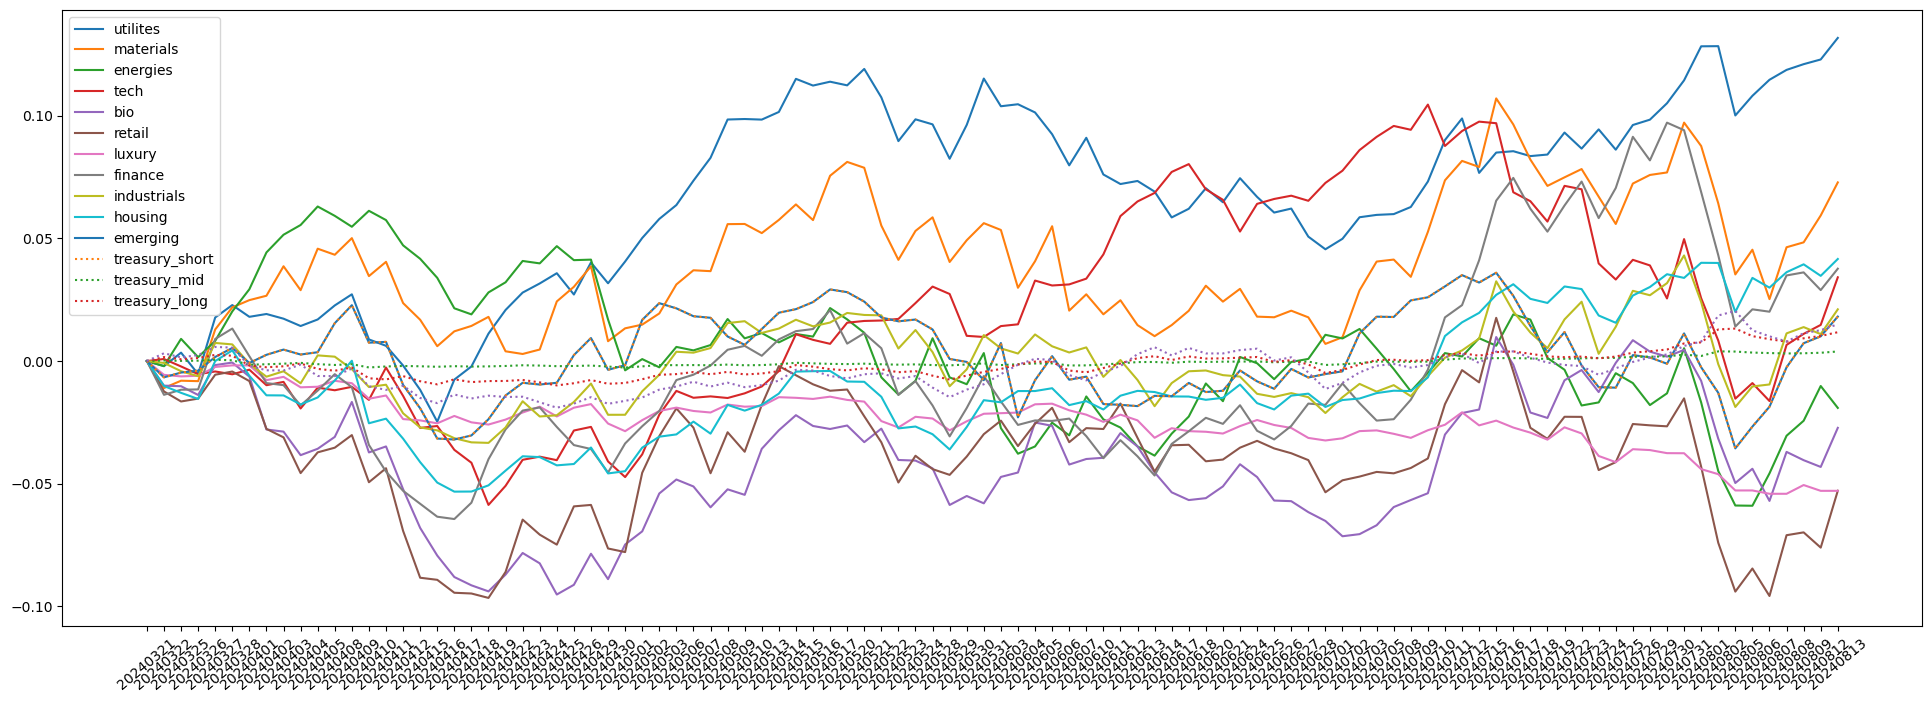

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(1, 1, 1)
legends = []

date_ticks = None

for category in tickers.keys():

    averaged_return = []
    legends.append(category)

    for ticker in tickers[category]:
        for exchanger in ('NYS', 'NAS', 'AMS'):
            ret = searcher.get_historical_price(exchanger, ticker, DateScale.DAY, get_current_date())
            df_ = pd.DataFrame(ret['output2'])
            if not len(df_):
                continue
            df = df_.sort_values('xymd')
            price = (df['clos'].values).astype('float64')
            subtract_by_before_day = np.insert(price, 0, price[0])[:-1]
            subtract_by_initial_price = np.ones(len(price)) * price[0]
            
            divide_by_before_day = np.insert(price, 0, 1)[:-1]
            divide_by_initial_price = subtract_by_initial_price
            
            returns = np.divide(price - subtract_by_initial_price, divide_by_initial_price) 
            averaged_return.append(returns)
             
            #ax.set_xticklabels(df['xymd'].values)
            date_ticks = df['xymd'].values
    averaged_return = np.sum(averaged_return, 0) / 3
    # print(averaged_return.shape)
    ax.plot(averaged_return) if not category.startswith('treasury') else ax.plot(averaged_return, linestyle='dotted')
    if category.startswith('emerging'):
        ax.plot(averaged_return, linestyle='dotted')

ax.set_xticks(np.arange(len(date_ticks)), date_ticks)
ax.set_xticklabels(date_ticks, rotation=40)
plt.legend(legends, loc='upper left')
plt.show()